In [1]:
# Imports
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
#reading the preprocessed data - (output of phase 1)
df = pd.read_csv('../data/processed/cleaned_data.csv')

In [3]:
#checking data entry upto 2022
df.tail(5)

,raceId,season,raceNumber,prixName,raceDate,driverId,constructorId,driverStartGridPos,driverFinalGridPos,driverFinalRank,...,driverChampionshipStandingPosition,driverChampionshipStandingWins,circuitName,circuitLocation,circuitCountry,driverRaceResultStatus,driverName,driverAge,driverDnf,constructorDnf
6990,1096,2022,22,Abu Dhabi Grand Prix,2022-11-20,854,210,12,16.0,16,...,16.0,0.0,Yas Marina Circuit,Abu Dhabi,UAE,+1 Lap,Mick Schumacher,24.0,0,1
6991,1096,2022,22,Abu Dhabi Grand Prix,2022-11-20,825,210,16,17.0,17,...,13.0,0.0,Yas Marina Circuit,Abu Dhabi,UAE,+1 Lap,Kevin Magnussen,30.0,0,1
6992,1096,2022,22,Abu Dhabi Grand Prix,2022-11-20,1,131,5,18.0,18,...,6.0,0.0,Yas Marina Circuit,Abu Dhabi,UAE,Hydraulics,Lewis Hamilton,38.0,0,1
6993,1096,2022,22,Abu Dhabi Grand Prix,2022-11-20,849,3,20,19.0,19,...,20.0,0.0,Yas Marina Circuit,Abu Dhabi,UAE,Collision damage,Nicholas Latifi,28.0,0,1
6994,1096,2022,22,Abu Dhabi Grand Prix,2022-11-20,4,214,10,0.0,20,...,9.0,0.0,Yas Marina Circuit,Abu Dhabi,UAE,Water leak,Fernando Alonso,42.0,0,1


In [4]:
#checking all features present
df.columns

Index(['raceId', 'season', 'raceNumber', 'prixName', 'raceDate', 'driverId',
       'constructorId', 'driverStartGridPos', 'driverFinalGridPos',
       'driverFinalRank', 'driverRacePoints', 'driverLapCount',
       'driverFatestLapNumber', 'driverFastestLapTime',
       'driverFastestLapSpeed', 'constructorRacePoints', 'driverNumber',
       'driverDateOfBirth', 'driverNationality', 'constructorName',
       'constructorNationality', 'constructorChampionshipStandingPoints',
       'constructorChampionshipStandingPosition',
       'constructorChampionshipStandingWins',
       'driverChampionshipStandingPoints',
       'driverChampionshipStandingPosition', 'driverChampionshipStandingWins',
       'circuitName', 'circuitLocation', 'circuitCountry',
       'driverRaceResultStatus', 'driverName', 'driverAge', 'driverDnf',
       'constructorDnf'],
      dtype='object')

In [5]:
#selecting features depending on correlation matrix from EDA performed in Phase 1
features = ['season','driverId','constructorId','driverStartGridPos', 'driverFinalGridPos',
            'driverChampionshipStandingPosition','constructorChampionshipStandingPosition']

#Dropping unnecessary features and setting target variable - driver ranking in each race
#and split dataset into training(80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(df[features], df['driverFinalRank'], test_size=0.2, random_state=42)

# Create Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy:', accuracy)

Model Accuracy: 0.5989992852037169


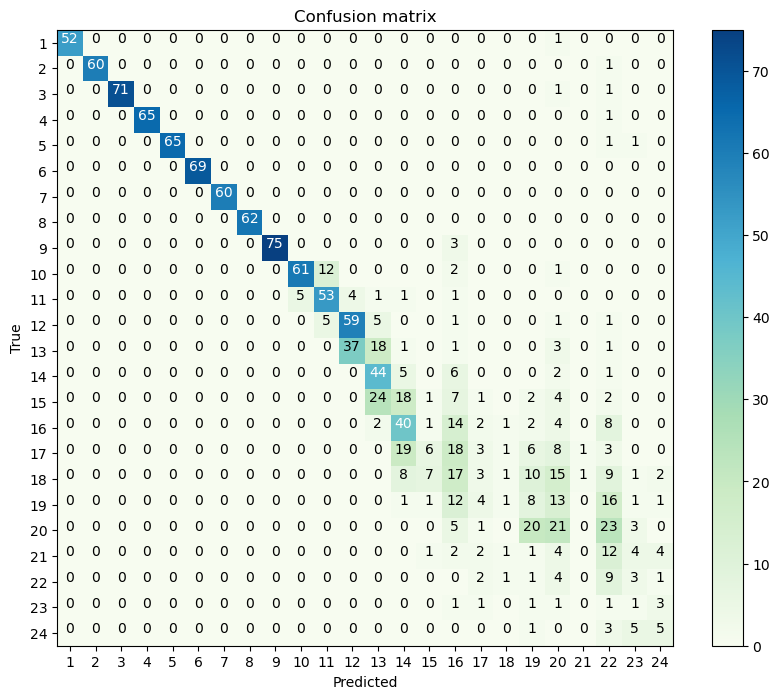

In [6]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
plt.imshow(cm, cmap=plt.cm.GnBu)
plt.title("Confusion matrix")
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


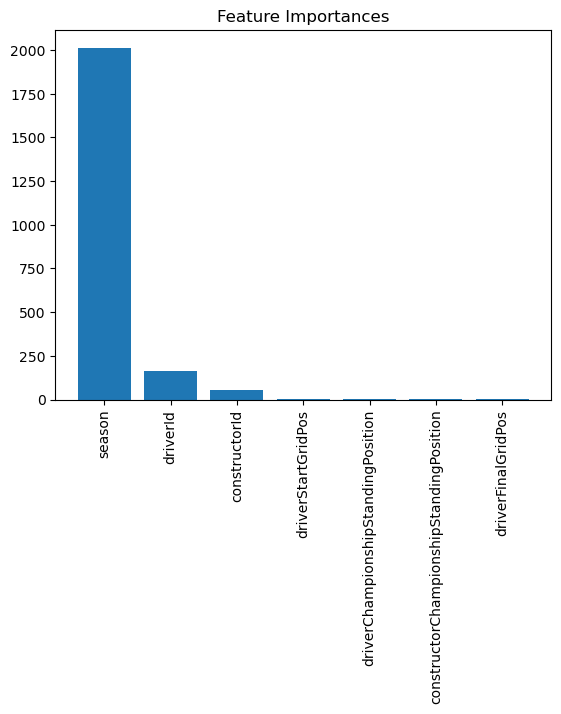

In [7]:
# Plot the feature importance graph
importances = gnb.theta_[0]
indices = np.argsort(importances)[::-1]
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.title("Feature Importances")
plt.show()

In [9]:
# Calculating classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           1       1.00      0.98      0.99        53
           2       1.00      0.98      0.99        61
           3       1.00      0.97      0.99        73
           4       1.00      0.98      0.99        66
           5       1.00      0.97      0.98        67
           6       1.00      1.00      1.00        69
           7       1.00      1.00      1.00        60
           8       1.00      1.00      1.00        62
           9       1.00      0.96      0.98        78
          10       0.92      0.80      0.86        76
          11       0.76      0.82      0.79        65
          12       0.59      0.82      0.69        72
          13       0.19      0.30      0.23        61
          14       0.05      0.09      0.07        58
          15       0.06      0.02      0.03        59
          16       0.16      0.19      0.17        74
          17       0.16      0.05      0.07        65
          18       0.17    

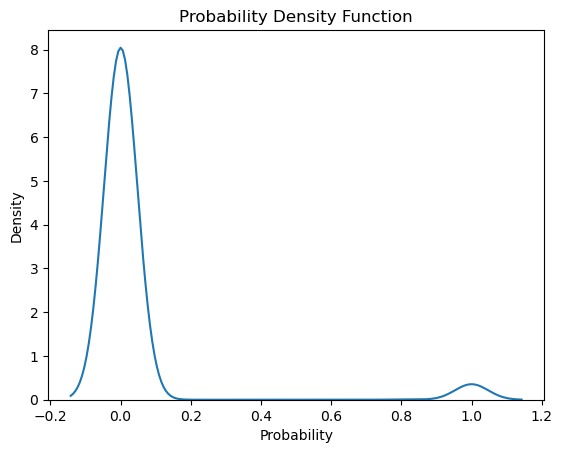

In [21]:
y_prob = gnb.predict_proba(X_test)[:,1]
sns.kdeplot(y_prob, label='Predicted Probabilities')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.title('Probability Density Function')
plt.show()


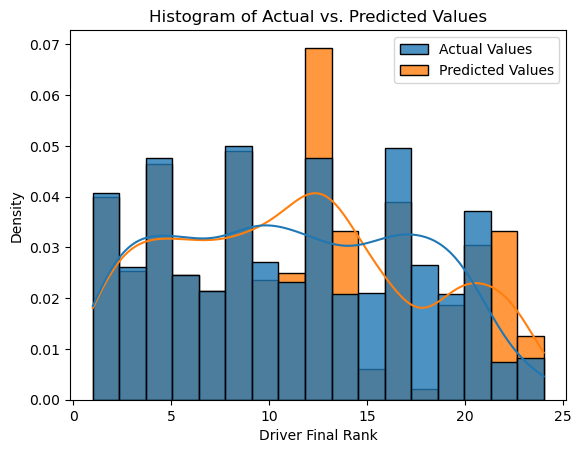

In [22]:
sns.histplot(data={'Actual Values': y_test, 'Predicted Values': y_pred}, 
             stat='probability', kde=True, alpha=0.8)
plt.xlabel('Driver Final Rank')
plt.ylabel('Density')
plt.title('Histogram of Actual vs. Predicted Values')
plt.show()
